# Demo 3: Computation of bounds for conductivity and elasticity

* Author: Mauricio Fernández
* Last update: 2020-06-17

Table of contents

* [1. Conductivity](#1.-Conductivity)
    * [1.1 Example in 2D](#1.1-Example-in-2D)
    * [1.1 Example in 3D](#1.1-Example-in-3D)
* [2. Elasticity](#2.-Elasticity)

## Description
The present notebook demonstrates how to compute bounds for given 2pc-equivalent structures. Routines for linear conductivity in 2D and 3D are available, as well as routines for linear elasticity in 3D.

In [1]:
import numpy as np

import src.eq2pc as e2
import src.conductivity as con
import src.elasticity as el

## 1. Conductivity

### 1.1 Example in 2D

Plots of Voigt, Reuss and HS bounds for components $K_{11}$ and $K_{22}$ of the effective conductivity matrix in 2D for 2-phase isotropic composite with conductivities $(K_1)_{ij} = k_1 \delta_{ij}, k_1 = 10$ (inclusion) and $(K_2)_{ij} = k_2 \delta_{ij}, k_2 = 1$ (matrix). 

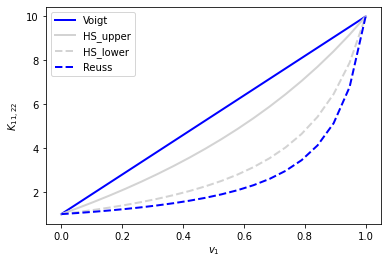

In [2]:
K = [10,1]
con.plot_2ph_iso(K,d=2)

In [3]:
roots = e2.roots_saved()

List of currently available roots:
	data/roots/1d_12_nev_5
	data/roots/2d_4_3_nev_3_2
	data/roots/2d_4_3_nev_5
	data/roots/3d_2_3_4_nev_5


<Figure size 432x288 with 0 Axes>

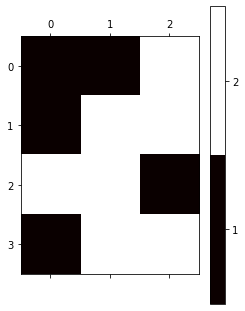

<Figure size 432x288 with 0 Axes>

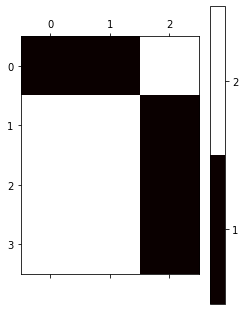

Are the shown structures related?
	False
Are the shown structures 2PC-equivalent?
	True


In [4]:
S1, S2 = e2.root_load(roots[2])

...computing for dimension 2
...volume fractions
[0.41666667 0.58333333]


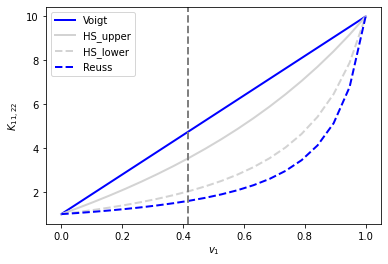

[1.6        2.03448276 3.53846154 4.75      ]
...computing for dimension 2
...volume fractions
[0.41666667 0.58333333]


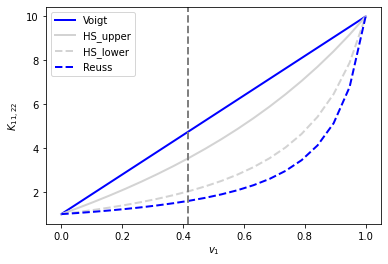

[1.6        2.03448276 3.53846154 4.75      ]


In [5]:
K = np.array([10,1])
bounds = con.S_iso_bounds(S1, K)
print(bounds)
bounds = con.S_iso_bounds(S2, K)
print(bounds)

### 1.2 Example in 3D

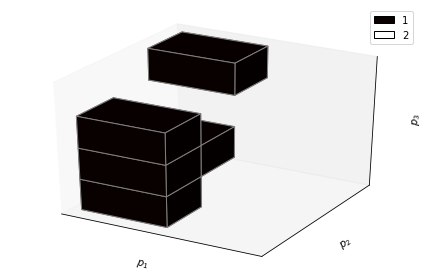

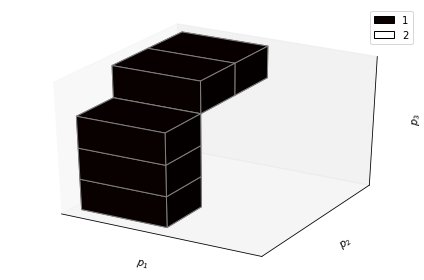

Are the shown structures related?
	False
Are the shown structures 2PC-equivalent?
	True
...computing for dimension 3
...volume fractions
[0.20833333 0.79166667]


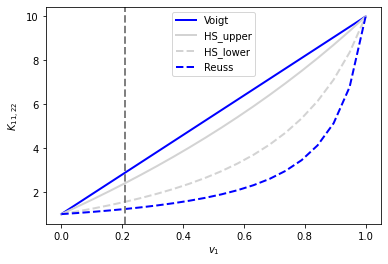

In [6]:
S1, S2 = e2.root_load(roots[3])
K = np.array([10, 1])
bounds = con.S_iso_bounds(S1, K)

## 2. Elasticity

Plots for stiffness components $K_{11} = K_{1111}$ and $K_{44} = K_{2323}$ of Voigt, Reuss and HS bounds for linear elasticity 3D for 2-phase isotropic composite with isotropic stiffnesses $K_1 = \mathrm{iso}(10,2)$ (inclusion) and $K_2 = \mathrm{iso}(1,5)$ (matrix). 

The notation $\mathrm{iso}(\lambda_1, \lambda_2)$ denotes $\mathrm{iso}(\lambda_1, \lambda_2) = \lambda_1 \mathbb{P}_1 + \lambda_2 \mathbb{P}_2$ with $(\mathbb{P}_1)_{ijkl} = \delta_{ij} \delta_{kl}/3$ and $(\mathbb{P}_2)_{ijkl} = (\delta_{ik}\delta_{jl} + \delta_{il}\delta_{jk})/2 - (\mathbb{P}_1)_{ijkl}$. This implies that $\lambda_1 = 3K$ and $\lambda_2 = 2G$, where $K$ and $G$ genotes the compression and shear moduli of the isotorpic material, respectively.

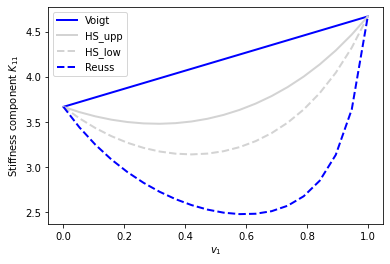

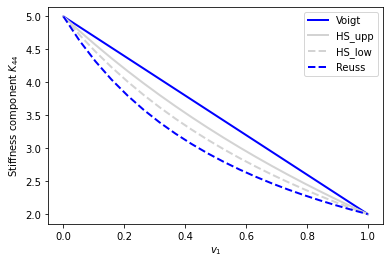

In [7]:
K = np.array([el.iso([10,2]),el.iso([1,5])])
el.plot_2ph_iso(K)

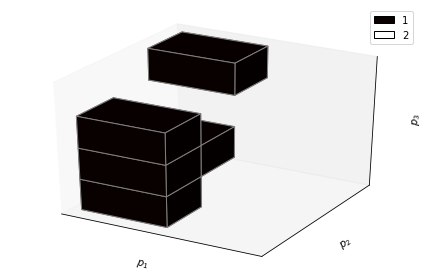

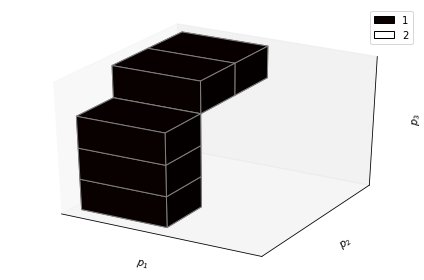

Are the shown structures related?
	False
Are the shown structures 2PC-equivalent?
	True


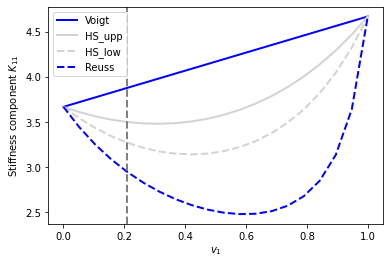

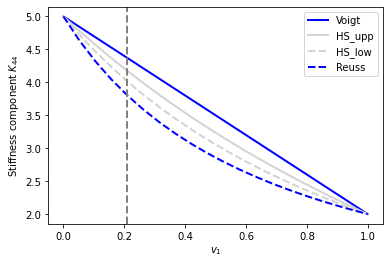

In [8]:
S1, S2 = e2.root_load(roots[3])
K = np.array([el.iso([10,2]),el.iso([1,5])])
bounds = el.S_iso_bounds(S1,K)

Returned bounds contains the Reuss, HS-, HS+ and Voigt bounds (6x6 matrices in normalized Voigt notation with covention (11,22,33,23,13,12)).

In [9]:
print(bounds.shape)
# Print Reuss bound
print(bounds[0])

(4, 6, 6)
[[ 2.94993895 -0.85958486 -0.85958486  0.          0.          0.        ]
 [-0.85958486  2.94993895 -0.85958486  0.          0.          0.        ]
 [-0.85958486 -0.85958486  2.94993895  0.          0.          0.        ]
 [ 0.          0.          0.          3.80952381  0.          0.        ]
 [ 0.          0.          0.          0.          3.80952381  0.        ]
 [ 0.          0.          0.          0.          0.          3.80952381]]
